In [1]:
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup()

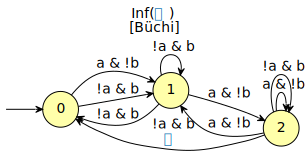

In [2]:
example=spot.automaton("""
HOA: v1
States: 3
Start: 0
name: "Hello world"
AP: 2 "a" "b"
properties: trans-acc
Acceptance: 1 Inf(0)
--BODY--
State: 0
[ 0&!1] 1
[!0& 1] 1
State: 1
[!0& 1] 0
[!0& 1] 1
[ 0&!1] 2
State: 2
[ 0&!1] 2
[!0& 1] 2
[ 0&!1] 1
[!0& 1] 0 {0}
--END--
""")
example.save("example_for_slim.hoa")

In [37]:
!cat example_for_slim.hoa
!java -jar ~/automaty/epmc-ashu-v7.jar formula2automaton --ashu-input-type hoa --ashu-input-file example_for_slim.hoa --ashu-automaton-type slim --ashu-output-file epmc.hoa
!cat epmc.hoa
epmc = spot.automaton("epmc.hoa")


HOA: v1
name: "Hello world"
States: 3
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0
[0&!1] 1
[!0&1] 1
State: 1
[!0&1] 0
[!0&1] 1
[0&!1] 2
State: 2
[0&!1] 2
[!0&1] 2
[0&!1] 1
[!0&1] 0 {0}
--END--
Running EPMC revision e703693fa2cb986db79133e03fded2c654a4314a
Assertions are disabled. In case of incorrect results or otherwise strange behaviour, please run the JVM with "-ea" parameter.
Computed automaton written to epmc.hoa
HOA: v1
name: "Hello world"
States: 14
Start: 0
AP: 3 "a" "b" "epsilon"
acc-name: parity max odd 2
Acceptance: 2 Inf(1) | Fin(0)
--BODY--
State: 0 "(0|):0"
[!0&!1|0&1] 1 {0}
[!0&1|0&!1] 2 {0}
State: 1 "(|):0"
[t] 1 {0}
State: 2 "(1|):0"
[!0&!1|0&1] 1 {0}
[!0&1] 3 {0}
[0&!1] 4 {0}
State: 3 "(0,1|):0"
[!0&!1|0&1] 1 {0}
[!0&1] 3 {0}
[0&!1] 5 {0}
State: 4 "(2|):0"
[!0&!1|0&1] 1 {0}
[!0&1] 6 {0}
[0&!1] 5 {0}
State: 5 "(1,2|):0"
[!0&!1|0&1] 1 {0}
[!0&1] 7 {0}
[0&!1] 5 {0}
State: 6 "(0,2|0):0"
[

In [37]:
# Build the slim automaton [strong] using the local copy of seminator
! ../seminator --slim --strong --via-tgba example_for_slim.hoa > slim.hoa
# weak version
# ! ../seminator --slim --weak- example_for_slim.hoa > slim_weak.hoa
# Build example of breaking point automaton 
# ! ../seminator --bp --pure --scc-aware=0 example_for_slim.hoa > bp.hoa
# Build the semi-deterministic automaton using the installed version of seminator
# ! seminator --tba --pure --scc-aware=0 --postprocess=0 example_for_slim.hoa > semi_deterministic.hoa
# Build it using local copy to see if it works too
# ! ../seminator --tba --pure --scc-aware=0 --postprocess=0 example_for_slim.hoa > semi_deterministic_local.hoa

/usr/bin/sh: line 1: 524533 Segmentation fault      (core dumped) ../seminator --slim --strong --via-tgba example_for_slim.hoa > slim.hoa


In [77]:
!rm slim.hoa
!seminator --slim  example_for_slim.hoa > slim.hoa
!cat slim.hoa

HOA: v1
States: 8
Start: 0
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0
[!0&1 | 0&!1] 1
State: 1
[!0&1] 1
[0&!1] 2
State: 2
[0&!1] 2
[!0&1] 3
State: 3
[!0&1 | 0&!1] 1 {0}
[!0&1] 4
[0&!1] 5
State: 4
[!0&1] 1 {0}
[0&!1] 2 {0}
[!0&1] 4
State: 5
[!0&1] 1 {0}
[0&!1] 2 {0}
[!0&1] 4
[0&!1] 6
State: 6
[!0&1 | 0&!1] 2 {0}
[!0&1] 7
State: 7
[0&!1] 2 {0}
[!0&1] 3 {0}
--END--

In [119]:
!ltl2tgba 'G(Fa U (b & Fc))' > bogus.hoa
!seminator  --slim  bogus.hoa 

HOA: v1
States: 14
Start: 0
AP: 3 "a" "b" "c"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0
[0&!1] 0
[1&2] 0 {0}
[!0&!1] 1
[!0&1&!2] 2
[0&1&!2] 3
State: 1
[0&!1] 0
[0&1&2] 0 {0}
[!0&!1] 1
[0&1&!2] 3
[!0&1&!2] 4
[!0&1&2] 5
State: 2
[0&2] 0 {0}
[!0&1&!2] 2
[0&!2] 3
[!0&!1&!2] 4
[!0&!1&2] 6
[!0&1&2] 7
State: 3
[0&2 | 1&2] 0 {0}
[!0&1&!2] 2
[0&!2] 3
[!0&!1&!2] 4
[!0&!1&2] 6
State: 4
[0&2] 0 {0}
[0&!2] 3
[!0&!2] 4
[!0&1&2] 5
[!0&!1&2] 6
State: 5
[0&!1 | 0&2] 0 {0}
[0&1&!2] 3 {0}
[!0] 5
State: 6
[0&!1 | 0&2] 0 {0}
[0&1&!2] 3 {0}
[!0&1&2] 5
[!0&!1] 6
[!0&1&!2] 8
State: 7
[0&!1 | 1&2] 0 {0}
[!0&!1] 1 {0}
[!0&1&!2] 2 {0}
[0&1&!2] 3 {0}
[!0&1&2] 7
[!0&!1] 9
[!0&1&!2] 10
State: 8
[0&2] 0 {0}
[0&1&!2] 3 {0}
[!0&1&2] 5
[!0&!1&2] 6
[!0&!2] 8
[0&!1&!2] 11
State: 9
[0&!1] 0 {0}
[!0&!1] 1 {0}
[0&1&!2] 3 {0}
[!0&1&!2] 4 {0}
[!0&1&2] 5 {0}
[!0&!1] 9
[!0&1&!2] 12
State: 10
[!0&1&!2] 2 {0}
[0&1&!2] 3 {0}
[!0&!1&!2] 4 {0}
[!0&!1&2] 6 {0}
[!0&1&2] 7

In [86]:
slim=spot.automaton("bogus.hoa")
display_inline(slim)

In [22]:
slim=spot.automaton("slim.hoa")
display_inline(slim)

### Display automata
For a display side-by-side we use the display_inline function from Spot. We can see all the three automata there.

In [38]:
display_inline(epmc)
slim = spot.automaton("slim.hoa")
slim_weak = spot.automaton("slim_weak.hoa")
bp = spot.automaton("bp.hoa")
semidet = spot.automaton("semi_deterministic.hoa")
semidet_local = spot.automaton("semi_deterministic_local.hoa")
display_inline(slim, slim_weak)
print("breakpoint and semideterministic automata")
display_inline(bp, semidet, semidet_local)

breakpoint and semideterministic automata


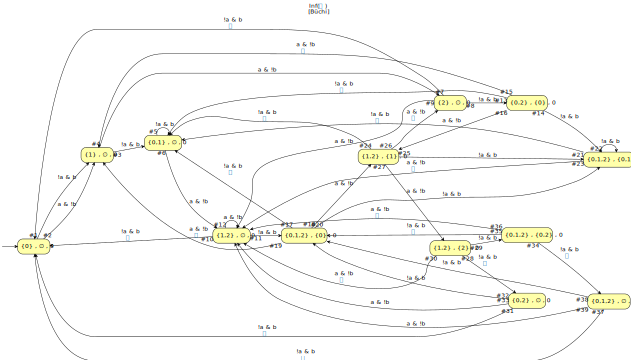

In [13]:
# Display the slim automaton with edge-numbers, we will use that for highlighting
slim.show(".#")

Below, the orange edge should not exist in the slim automaton. In case we reach a break-point, "slim-edges" are not created. (executed in old version below) 

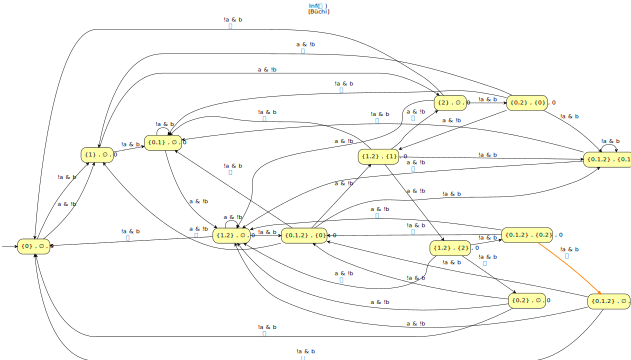

In [14]:
slim.highlight_edges([34], 2)

In [114]:
# Deterministic - nothing should happen

In [29]:
!ltl2tgba 'G(((a) R (!(b))) & ((b) R ((G(a)) | (X(c)))))' | seminator --slim > 1.hoa
!ltl2tgba 'G(((a) R (!(b))) & ((b) R ((G(a)) | (X(c)))))' | seminator --slim --weak > 2.hoa
!ltl2tgba 'G(((a) R (!(b))) & ((b) R ((G(a)) | (X(c)))))' | seminator > 4.hoa
!cat 1.hoa
!java -jar ~/automaty/epmc-ashu-v7.jar formula2automaton --ashu-input-file '1.hoa' --ashu-output-file epmc.hoa

HOA: v1
name: "sDBA for G((a R !b) & (b R (Ga | Xc)))"
States: 4
Start: 1
AP: 3 "b" "a" "c"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels state-acc deterministic weak
--BODY--
State: 0 {0}
[!0&1] 0
State: 1
[!0&!1] 2
[!0&1] 3
State: 2 {0}
[!0&!1&2] 2
[!0&1&2] 3
State: 3 {0}
[!0&1&!2] 0
[!0&!1&2] 2
[!0&1&2] 3
--END--
Running EPMC revision e703693fa2cb986db79133e03fded2c654a4314a
Assertions are disabled. In case of incorrect results or otherwise strange behaviour, please run the JVM with "-ea" parameter.
Parsing error: Encountered "<EOF>" at line 0, column 0.
Was expecting:
    "HOA:" ...
    


In [2]:
slim = spot.automaton("1.hoa")
weak = spot.automaton("2.hoa")
dt = spot.automaton("4.hoa")

coto = spot.automaton("cotokurde")
display_inline(coto,slim,weak, dt)

In [125]:
# 2 state example with 2 acceptance sets
!echo 'G(F!a & (b U Xa))' > Garfield

!cat Garfield | ltl2tgba  > input.hoa
!cat input.hoa
!cat Garfield | ltl2tgba  | seminator --slim --pure > output.hoa
!cat Garfield | ltl2tgba  | seminator --slim --weak --pure > weak.hoa
!cat Garfield | ltl2tgba  | seminator --bp --pure> bp.hoa
!cat Garfield | ltl2tgba  | seminator  > det.hoa

inputek = spot.automaton("input.hoa")
outputek = spot.automaton("output.hoa")
weak = spot.automaton("weak.hoa")
bp = spot.automaton("bp.hoa")
det = spot.automaton("det.hoa")
outputek.show(".#")
#if just the highlighted edges would be accepting, automaton still should work the same
outputek.highlight_edges([14,16],2)
display_inline(inputek,outputek, weak, bp, det)

HOA: v1
name: "G(F!a & (b U Xa))"
States: 2
Start: 0
AP: 2 "b" "a"
acc-name: generalized-Buchi 2
Acceptance: 2 Inf(0)&Inf(1)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0
[0&!1] 0 {1}
[0&1] 0
[!1] 1 {0 1}
[1] 1 {0}
State: 1
[0&1] 0
[1] 1 {0}
--END--


In [126]:
# 3 acceptance sets automation, tests failing on this before

!echo 'G(Fa | (Fb & Fc))' > Garfield

!cat Garfield | ltl2tgba  > input.hoa
#!cat input.hoa
!cat Garfield | ltl2tgba  | seminator --slim --pure > output.hoa

outputek = spot.automaton("output.hoa")
display_inline(outputek)